## Linear Regression - Paradigma Probabilistik

Ingat kembali model regresi linear:
$$
f_\mathbf{w}(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b
$$

yang apabila diberikan dataset $\{ \mathbf{x}^{(i)}, y^{(i)}\}_{i=1}^n$ parameter optimum $\mathbf{\hat{w}}$ dapat dicari via *least square optimization*. 

Model regresi linear mengasumsikan relasi antara input $\mathbf{x}$ dan output $y$ bersifat linear. 
Dalam padangan probabilitik, ada asumsi lain yang ditambahkan yaitu adanya *noise* $\epsilon$ antara input dan output:

$$
y^{(i)} = \mathbf{w}^\top \mathbf{x}^{(i)} + b + \epsilon^{(i)}
$$

dimana $\epsilon$ berasal dari distribusi Gaussian/normal.

Sifat-sifat yang harus terpenuhi terkait *noise* $\epsilon$ adalah

1. Unbiased: $\mathbb{E}[\epsilon^{(i)}] = 0$
2. Error independent: $\mathbb{E}[\epsilon^{(i)} \epsilon^{(j)}] = \mathbb{E}[\epsilon^{(i)}] \mathbb{E}[\epsilon^{(j)}]$

### Fungsi Distribusi Gaussian / Normal

Fungsi distribusi probabilitas

$$
\mathcal{N}(z; \mu, \sigma) = P(z; \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left( - \frac{(z - \mu)^2}{2 \sigma^2}\right)}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define probability density function for gaussian distribution
gaussian = lambda z, mu, sigma: 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((z - mu) / sigma) ** 2)

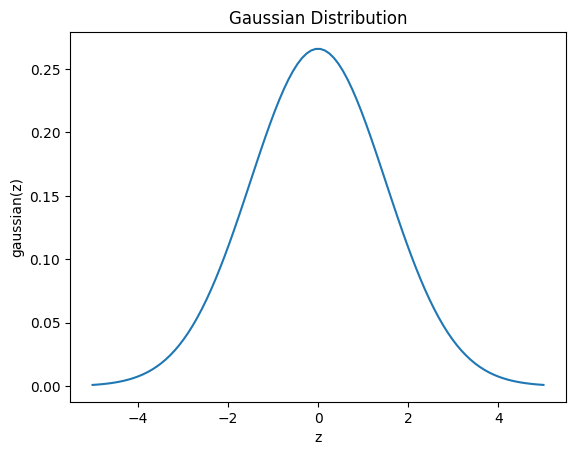

In [3]:
z = np.linspace(-5, 5, 100)
mu = 0
sigma = 1.5

f = gaussian(z, mu, sigma)

# Plot the gaussian distribution
plt.title("Gaussian Distribution")
plt.xlabel("z")
plt.ylabel("gaussian(z)")
plt.plot(z, f)

### Sampel dari Distribusi Normal

In [4]:
# Generate 1D samples
s = np.random.normal(mu, sigma, 1000)

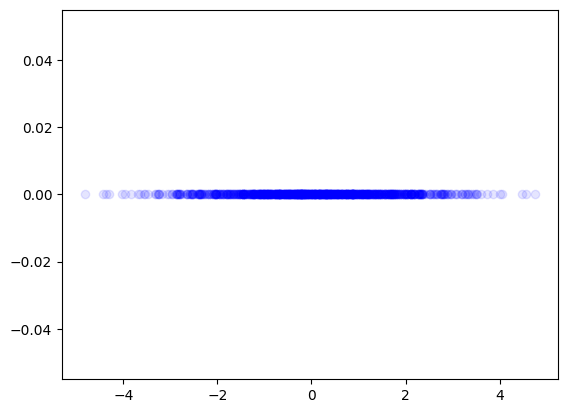

In [5]:
# Plot the samples in 1D
plt.scatter(s, np.zeros_like(s), alpha=0.1, color="blue")

(array([ 1.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  2.,  0.,  1.,  1.,  1.,
         2.,  1.,  2.,  4.,  1.,  2.,  2.,  8.,  5.,  4.,  8.,  3., 13.,
         5.,  5.,  9., 14.,  7.,  9., 10., 10., 10., 20.,  9., 20., 16.,
        25., 20., 18., 22., 25., 21., 25., 23., 36., 35., 22., 23., 29.,
        23., 34., 23., 19., 23., 20., 20., 29., 16., 20., 18., 14., 16.,
        17., 13., 16., 15., 12., 11., 12., 15., 10., 17.,  2.,  4.,  5.,
         3., 10.,  3.,  3.,  3.,  3.,  5.,  2.,  3.,  2.,  0.,  1.,  1.,
         0.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  1.]),
 array([-4.82880801, -4.73288045, -4.6369529 , -4.54102534, -4.44509779,
        -4.34917023, -4.25324268, -4.15731512, -4.06138757, -3.96546001,
        -3.86953246, -3.7736049 , -3.67767735, -3.58174979, -3.48582224,
        -3.38989468, -3.29396712, -3.19803957, -3.10211201, -3.00618446,
        -2.9102569 , -2.81432935, -2.71840179, -2.62247424, -2.52654668,
        -2.43061913, -2.33469157, -2.23876402, -2.14283646, -2.046908

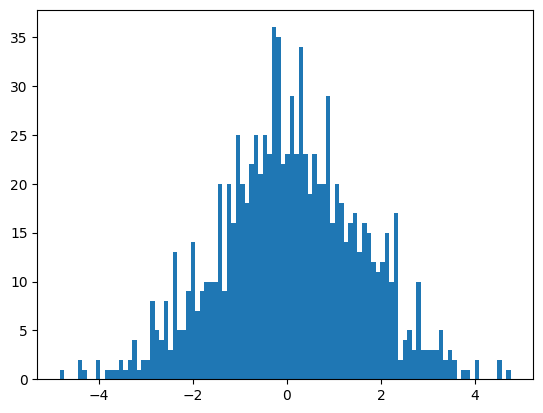

In [6]:
# Plot the histogram of the samples
plt.hist(s, bins=100)

In [7]:
# Generate 2D samples
s = np.random.normal(mu, sigma, (1000, 2))

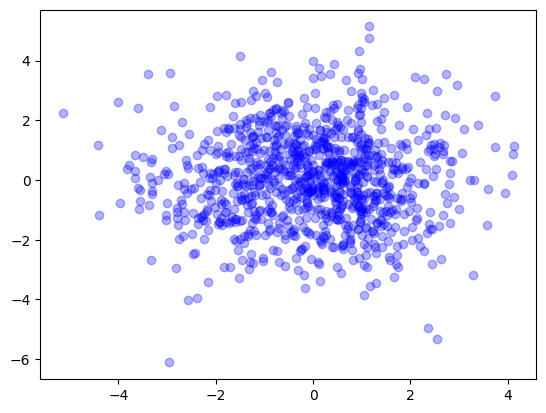

In [8]:
plt.scatter(s[:, 0], s[:, 1], alpha=0.3, color="blue")

### Fungsi Linear Probabilistik (dengan Gaussian Noise)

In [9]:
# Linear function
f_lin = lambda x, w: w[1] * x + w[0]

In [10]:
# Generate 1D samples
x = np.linspace(0, 5, 20)
w = np.array([0.3, 4.5])

mu = 0
sigma = 1.5
eps = np.random.normal(mu, sigma, len(x))
print(eps)

s = f_lin(x, w)

y = s + eps
print(y)

[ 0.16741631  0.38127431  0.59847665 -1.39839177  0.46040244 -3.0403338
 -2.03547339 -0.85413729  1.37065896  0.08567834  0.76041973 -0.63796172
 -2.62450482  0.38460998 -2.10505254  0.36976287  1.55034593 -1.1228477
  0.2475625  -0.58212847]
[ 0.46741631  1.86548483  3.26689771  2.45423981  5.49724454  3.18071883
  5.36978977  7.7353364  11.14434317 11.04357307 12.90252499 12.68835406
 11.88602149 16.07934682 14.77389483 18.43292077 20.79771436 19.30873125
 21.86335198 22.21787153]


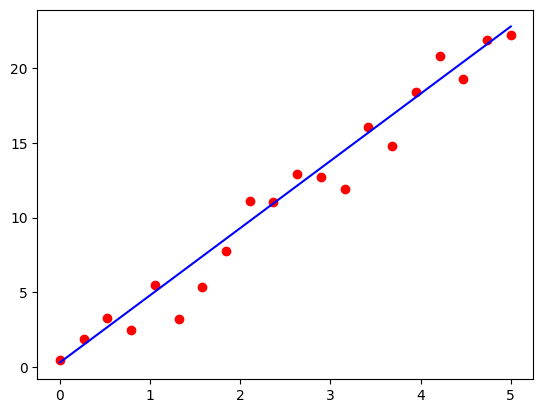

In [11]:
# Plot probabilistic linear function
plt.plot(x, s, color="blue")
plt.scatter(x, y, color="red")

### Maximum Likelihood Estimation
Dengan asumsi $\epsilon \sim \mathcal{N}(0, \sigma^2)$, kita dapatkan fungsi probabilitas kondisional (conditional probability) dari $y$ diketahui $\mathbf{x}$, yang juga dalam bentuk distribusi normal:

$$
P(y | \mathbf{x}; \mathbf{w}) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left( - \frac{(y - \mathbf{w}^\top \mathbf{x})^2}{2 \sigma^2}\right)}
$$

Diberikan $n$ data: $\{ \mathbf{x}^{(i)}, y^{(i)}\}_{i=1}^n$ yang bersifat i.i.d. (*independent and identically distributed*), kita ingin mencari parameter $\mathbf{w}$ sehingga fungsi distribusi normal tersebut dapat disesuaikan terhadap data observasi.

#### Fungsi likelihood dan log-likehood
Untuk dapat mencari $\mathbf{w}$, perlu didefinisikan fungsi *likelihood*, yaitu probabilitas gabungan dari seluruh sampel terobservasi yang dilihat sebagai fungsi dari parameter model. 
Dikarenakan asumsi *i.i.d.*, fungsi *likelihood* untuk seluruh $\{ \mathbf{x}^{(i)}, y^{(i)}\}_{i=1}^n$:

$$
\mathcal{L}(\mathbf{w}) = \prod_{i=1}^n P(y^{(i)} | \mathbf{x}^{(i)}; \mathbf{w}) 
= \prod_{i=1}^n \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left(- \frac{(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)})^2 }{2 \sigma^2} \right)}
$$

Menghitung fungsi di atas dalam bentuk multiplikasi cukup sulit. Salah satu trik yang digunakan adalah menggunakan logaritma $\log$ untuk menkonversi perkalian ke penjumlahan, sehingga menghasilkan fungsi yang dinamakan *log-likelihood*:

$$
\log{\mathcal{L}(\mathbf{w})} = \frac{n}{\sigma \sqrt{2 \pi}} - \sum_{i=1}^n \frac{(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)})^2 }{2 \sigma^2} 
$$

Maximum likelihood estimation (MLE) berarti mencari parameter $\mathbf{w}$ yang memaksimalkan fungsi log likelihood:
$$
\mathbf{w} := \arg \max_{\mathbf{w}} \log{\mathcal{L}(\mathbf{w})}
$$

Dapat dilihat bahwa besaran pertama pada fungsi log-likelihood tidak bergantung nilai parameter $\mathbf{w}$. 
Dengan demikian MLE di atas dapat ditulis sebagai

$$
\arg \max_{\mathbf{w}} - \sum_{i=1}^n (y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)})^2
$$

Interpretasi lain yang equivalen dengan pernyataan tersebut yaitu dengan meminimalkan nilai negatif dari fungsi log-likelihood:

$$
\arg \min \sum_{i=1}^n (y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)})^2
$$

yang tidak lain merupakan optimisasi least squares (LS)!